In [ ]:
%matplotlib inline


# Algoritmo Mean Shift


Reference:

Dorin Comaniciu and Peter Meer, "Mean Shift: A robust approach toward
feature space analysis". IEEE Transactions on Pattern Analysis and
Machine Intelligence. 2002. pp. 603-619.




Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Homogeneity: 0.941
Completeness: 0.941
V-measure: 0.941
Adjusted Rand Index: 0.961
Adjusted Mutual Information: 0.941
Silhouette Coefficient: 0.640


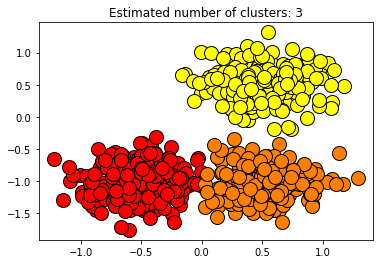

In [7]:
print(__doc__)

import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# #############################################################################
# Generamos las muestras con poca distancia
#centers = [[1, 1], [-1, -1], [1, -1]]
centers = [[0.5, 0.5], [-0.5, -1], [0.5, -1.0]]
O, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.25,
                            random_state=0)

#escalamos
X = StandardScaler().fit_transform(O)

# #############################################################################
#centers = [[1, 1], [-1, -1], [1, -1]]
#X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print('Estimated number of clusters: %d' % n_clusters_)
#print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.autumn(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    cluster_center = cluster_centers[k]

    xy = O[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

